In [1]:
from BertFineTuning.question_answering_model_config import *
from BertFineTuning.loader import *
from BertFineTuning.loader_config import default_loader_config
from BertFineTuning.question_answering import *
from transformers.optimization import AdamW,get_linear_schedule_with_warmup
from BertFineTuning.cyclicLR import CyclicCosAnnealingLR
from transformers import BertForQuestionAnswering
import torch
%matplotlib inline

In [2]:
BFT=BertFineTuning()#base_model=BertForQuestionAnswering

In [3]:
dataloader_config={
'train-v1.1_bert_ready':default_loader_config,
'dev-v1.1_bert_ready':default_loader_config,
'train-v2.0_bert_ready':default_loader_config,
'dev-v2.0_bert_ready':default_loader_config
}

In [4]:
model_config

{'num_classes': 2,
 'dropout_prob': 0.6,
 'in_features': 768,
 'learning_rate_PT': 0.0001,
 'learning_rate_CLS': 0.0001,
 'weight_decay': 0,
 'weight_decay_PT': 1e-10,
 'weight_decay_CLS': 1e-05,
 'max_token_length': 200,
 'device': device(type='cuda', index=0)}

In [5]:
cwd = os.getcwd()
processed_data_folder=os.path.join(cwd,'data','processed')
ml=MultiLoader(processed_data_folder,dataloader_config,model_config,show_warning=False)

In [6]:
# BFT.scheduler=CyclicCosAnnealingLR(BFT.optimizer,
#                                    milestones=list(range(0,len(ml.train_v1_1_bert_ready)*20,len(ml.train_v1_1_bert_ready)//2)),
#                                    decay_milestones=list(range(0,len(ml.train_v1_1_bert_ready)*20,len(ml.train_v1_1_bert_ready))),
#                                    eta_min=1e-12)

In [7]:
BFT.criterion=nn.CrossEntropyLoss()
BFT.optimizer = AdamW(BFT.parameters_main)
# BFT.scheduler=torch.optim.lr_scheduler.StepLR(BFT.optimizer, step_size=100)
# BFT.scheduler=get_linear_schedule_with_warmup(BFT.optimizer,num_warmup_steps=1,num_training_steps=10*(len(ml.train_v1_1_bert_ready)*5))
BFT.scheduler=CyclicCosAnnealingLR(BFT.optimizer,
                                   milestones=list(range(0,len(ml.train_v1_1_bert_ready)*20,len(ml.train_v1_1_bert_ready))),
                                   decay_milestones=list(range(0,len(ml.train_v1_1_bert_ready)*20,len(ml.train_v1_1_bert_ready))[9:]),
                                   eta_min=1e-10)
BFT.scheduler_step_batch=True
BFT.scheduler_step_epoch=False

In [8]:
# model_config={'num_classes': 2,
#  'dropout_prob': 0.1,
#  'in_features': 768,
#  'learning_rate_PT': 1e-05,
#  'learning_rate_CLS': 1e-2,
#  'weight_decay': 0,
#  'max_token_length': 100,
#  'device': device}

In [9]:
# _loader_dict=next(iter(ml.train_v1_1_bert_ready))
# ids,list_of_indices,segments_ids,labels=_loader_dict.values()
# start_labels=labels['start_label']
# end_labels=labels['end_label']
# span_str=labels['span_label']
# span=[eval(item) for item in span_str]
# output_start,output_end,output=BFT.model(list_of_indices,segments_ids)

In [10]:
# loc_start=torch.argmax(output_start,dim=1).data.cpu().numpy()
# loc_end=torch.argmax(output_end,dim=1).data.cpu().numpy()
# span_target=[list(range(*item)) for item in list(zip(loc_start,loc_end+1))] 

In [11]:
# span=[list(range(*item)) for item in list(zip(start_labels,start_labels+1))] 
# for i,r in enumerate(span):
#     labels[i,r]=1
# labels=labels.flatten()

In [12]:
BFT.train(ml.train_v1_1_bert_ready,ml.dev_v1_1_bert_ready,epochs=100,print_every=100,validate_at_epoch=0)

train results: 

epoch:  1  step:  1 / 130
Batch Loss:  5.311686
Exact match mean:  0.002
Any match mean:  0.34600000000000003 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.040521359416162375, 1.0: 0.040521359416162375}
Accuracy:  {0.0: 0.77901, 1.0: 0.77901}
{'F1 Macro ': 0.4663189742471495} {'F1 Micro': 0.77901}
{'F1 ': {0.0: 0.8748251154096689, 1.0: 0.057812833084630144}}
Precision:  {0.0: 0.9823559343594962, 1.0: 0.031697054698457225}
recall:  {0.0: 0.7885127890948078, 1.0: 0.32832929782082326}
Predict     0.0         1.0         
Actual
0.0         77223       20712       

1.0         1387        678         


train results: 

epoch:  1  step:  2 / 130
Batch Loss:  5.2796154
Exact match mean:  0.004
Any match mean:  0.18200000000000002 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.015762071483252024, 1.0: 0.015762071483252024}
Accuracy:  {0.0: 0.83654, 1.0: 0.83654}
{'F1 Macro ': 0.4789075948629565} {'F1 Micro': 0.83654}
{'F1 ': {0.0: 0.9106013869746888, 1.0: 0.04721380275122406}}
Pre

train results: 

epoch:  1  step:  15 / 130
Batch Loss:  5.215416
Exact match mean:  0.0
Any match mean:  0.23800000000000004 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.04853015066526698, 1.0: 0.04853015066526698}
Accuracy:  {0.0: 0.85189, 1.0: 0.85189}
{'F1 Macro ': 0.4939326227019117} {'F1 Micro': 0.85189}
{'F1 ': {0.0: 0.9195504690309229, 1.0: 0.06831477637290055}}
Precision:  {0.0: 0.9810161791293867, 1.0: 0.03958880139982502}
recall:  {0.0: 0.8653329107842035, 1.0: 0.24896836313617607}
Predict     0.0         1.0         
Actual
0.0         84646       13173       

1.0         1638        543         


train results: 

epoch:  1  step:  16 / 130
Batch Loss:  5.2187757
Exact match mean:  0.0
Any match mean:  0.508 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.058463231133478316, 1.0: 0.058463231133478316}
Accuracy:  {0.0: 0.71122, 1.0: 0.71122}
{'F1 Macro ': 0.44832281516211464} {'F1 Micro': 0.71122}
{'F1 ': {0.0: 0.8291566093994036, 1.0: 0.06748902092482563}}
Precision:  {0.0: 0.98

train results: 

epoch:  1  step:  29 / 130
Batch Loss:  5.2088356
Exact match mean:  0.0
Any match mean:  0.14400000000000002 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.035059782745375155, 1.0: 0.035059782745375155}
Accuracy:  {0.0: 0.90232, 1.0: 0.90232}
{'F1 Macro ': 0.5052545441969983} {'F1 Micro': 0.90232}
{'F1 ': {0.0: 0.9484772082326755, 1.0: 0.0620318801613213}}
Precision:  {0.0: 0.9794115404307236, 1.0: 0.03938544079990245}
recall:  {0.0: 0.9194371439966458, 1.0: 0.14595571622232265}
Predict     0.0         1.0         
Actual
0.0         89909       7878        

1.0         1890        323         


train results: 

epoch:  1  step:  30 / 130
Batch Loss:  5.233035
Exact match mean:  0.002
Any match mean:  0.29400000000000004 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.020602717642913108, 1.0: 0.020602717642913108}
Accuracy:  {0.0: 0.79662, 1.0: 0.79662}
{'F1 Macro ': 0.4671304598813161} {'F1 Micro': 0.79662}
{'F1 ': {0.0: 0.886147094058242, 1.0: 0.04811382570439015}}
Precisi

train results: 

epoch:  1  step:  43 / 130
Batch Loss:  5.1772623
Exact match mean:  0.006000000000000001
Any match mean:  0.36200000000000004 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.048833537613067336, 1.0: 0.048833537613067336}
Accuracy:  {0.0: 0.78631, 1.0: 0.78631}
{'F1 Macro ': 0.47070092698369226} {'F1 Micro': 0.78631}
{'F1 ': {0.0: 0.8794203781761549, 1.0: 0.061981475791229534}}
Precision:  {0.0: 0.9830202722307023, 1.0: 0.034058565294997345}
recall:  {0.0: 0.7955752031690284, 1.0: 0.34405458089668617}
Predict     0.0         1.0         
Actual
0.0         77925       20023       

1.0         1346        706         


train results: 

epoch:  1  step:  44 / 130
Batch Loss:  5.1948323
Exact match mean:  0.004
Any match mean:  0.13999999999999999 

{0.0: 'Poor', 1.0: 'Poor'}
MCC:  {0.0: 0.02161980036035949, 1.0: 0.02161980036035949}
Accuracy:  {0.0: 0.90986, 1.0: 0.90986}
{'F1 Macro ': 0.5009217500228113} {'F1 Micro': 0.90986}
{'F1 ': {0.0: 0.9526873819021625, 1.0: 0.049156

KeyboardInterrupt: 

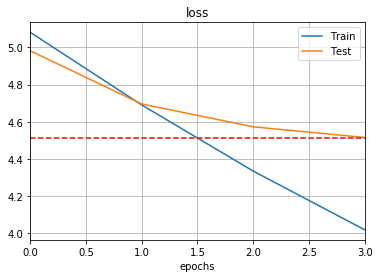

In [13]:
df_loss=pd.DataFrame([[np.mean(item) for item in chunks(BFT.loss_history,
                                                       math.ceil(len(BFT.loss_history)/len(BFT.test_loss_history))
                                                       )],BFT.test_loss_history]).T
df_loss.index.name='epochs'
df_loss.columns=['Train','Test']
ax=df_loss.plot(title='loss',grid=True)
# ax.axvline(2, color="red", linestyle="--")
ax.axhline(np.min(BFT.test_loss_history), color="red", linestyle="--")

In [ ]:
# from transformers import BertTokenizer
# x="""[CLS] What is the primary seminary of the Congregation of the Holy Cross? [SEP] The university is the major seat of the Congregation of Holy Cross (albeit not its official headquarters, which are in Rome). Its main seminary, Moreau Seminary, is located on the campus across St. Joseph lake from the Main Building. Old College, the oldest building on campus and located near the shore of St. Mary lake, houses undergraduate seminarians. Retired priests and brothers reside in Fatima House (a former retreat center), Holy Cross House, as well as Columba Hall near the Grotto. The university through the Moreau Seminary has ties to theologian Frederick Buechner. While not Catholic, Buechner has praised writers from Notre Dame and Moreau Seminary created a Buechner Prize for Preaching. [SEP]
# """
# tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
# tokenizer.convert_tokens_to_string(tokenizer.tokenize(x)[44:47])

In [ ]:
BFT.load_checkpoint(BFT.save_folder+'\checkpoint7.pth')

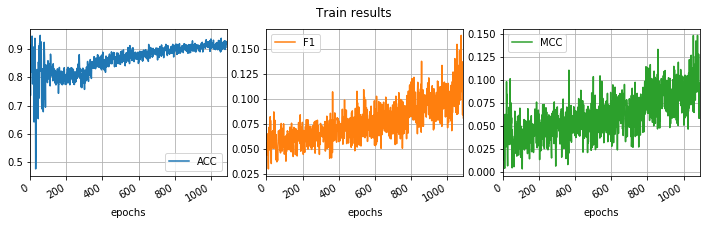

In [14]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1],item.MCC[1]] for i,item in enumerate(BFT.cm_train)])
df.columns=['ACC','F1','MCC']
df.index.name='epochs'
df.plot(subplots=True,figsize=(12,3),layout=(1,3),title='Train results',grid=True);

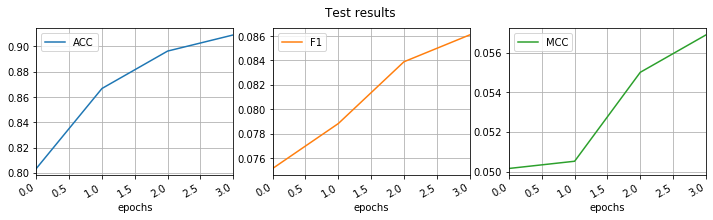

In [15]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1],item.MCC[1]] for i,item in enumerate(BFT.cm_test)])
df.columns=['ACC','F1','MCC']
df.index.name='epochs'
df.plot(subplots=True,figsize=(12,3),layout=(1,3),title='Test results',grid=True);

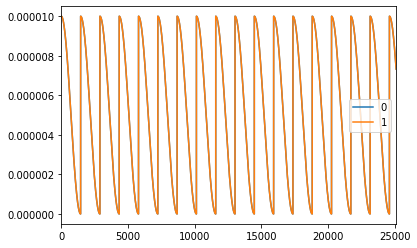

In [16]:
pd.DataFrame(BFT.learning_rate).plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFCE0EA940>,
      dtype=object)

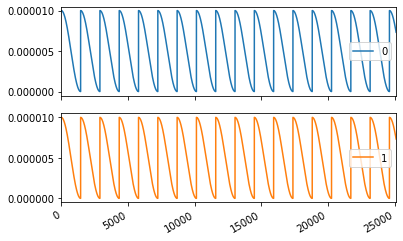

In [17]:
pd.DataFrame(BFT.learning_rate).plot(subplots=True)